# 底打ちどころを探る

## 目的

時価総額の大きい銘柄の値動きのトレンドを読むことで、底打ちどころを探る

In [12]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [13]:
def get_code_into(code):
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    print(code, ticker.info['longName'])
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new   
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    print(ser.tail(3))

### 東証で時価総額上位

Reference: https://www.nikkei.com/marketdata/ranking-jp/market-cap-high/

In [14]:
pattern = re.compile(r'([0-9]{4}-[0-9]{2}-[0-9]{2}).*')

In [15]:
pattern_code = re.compile(r'^(.+)([0-9A]{4}).+$')

ods_name = 'mkt_capital_top_30.ods'
df_ods = pd.read_excel(ods_name)
list_code = list()
for name in df_ods['銘柄名']:
    m = pattern_code.match(name)
    if m:
        print(m.group(1))
        code = m.group(2)
        list_code.append(code)
    else:
        print('ERROR!', name)
print(list_code)

トヨタ
ソニーＧ
三菱ＵＦＪ
日立
ファストリ
キーエンス
任天堂
ＮＴＴ
三井住友ＦＧ
リクルート
中外薬
ＫＤＤＩ
伊藤忠
ＳＢ
ＳＢＧ
三菱商
東京海上
東エレク
三菱重
みずほＦＧ
ＪＴ
信越化
三井物
ホンダ
武田
第一三共
富士通
キヤノン
ＯＬＣ
三菱電
['7203', '6758', '8306', '6501', '9983', '6861', '7974', '9432', '8316', '6098', '4519', '9433', '8001', '9434', '9984', '8058', '8766', '8035', '7011', '8411', '2914', '4063', '8031', '7267', '4502', '4568', '6702', '7751', '4661', '6503']


In [16]:
dt = pd.to_datetime('2025-03-27')
dt

Timestamp('2025-03-27 00:00:00')

In [17]:
summary = pd.DataFrame()
for code in list_code:
    symbol = '%s.T' % code
    ticker = yf.Ticker(symbol)
    df = ticker.history(start='2025-03-24', interval='1d')
    if len(df) == 0:
        print('### no data in', symbol)
        continue
    list_new = list()
    for dt_ts in df.index:
        m = pattern.match(str(dt_ts))
        if m:
            list_new.append(pd.to_datetime(m.group(1)))
        else:
            print('Error!')
    df.index = list_new            
    base = df.at[dt, 'Close']
    ser = df['Close'] / base
    summary[code] = ser

summary

,7203,6758,8306,6501,9983,6861,7974,9432,8316,6098,...,2914,4063,8031,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.984000,0.992380,0.994455,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.983333,0.980088,1.001085,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,0.992000,0.985988,0.993370,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.989588,0.994573,0.967552,0.970787,...,1.005749,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.923372,0.981683,0.932891,0.924312,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.932049,0.980326,0.920354,0.940488,...,0.995928,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.951685,0.968114,0.904867,0.977064,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.920632,0.966757,0.835300,0.961251,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.911225,0.977612,0.768191,0.896910,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


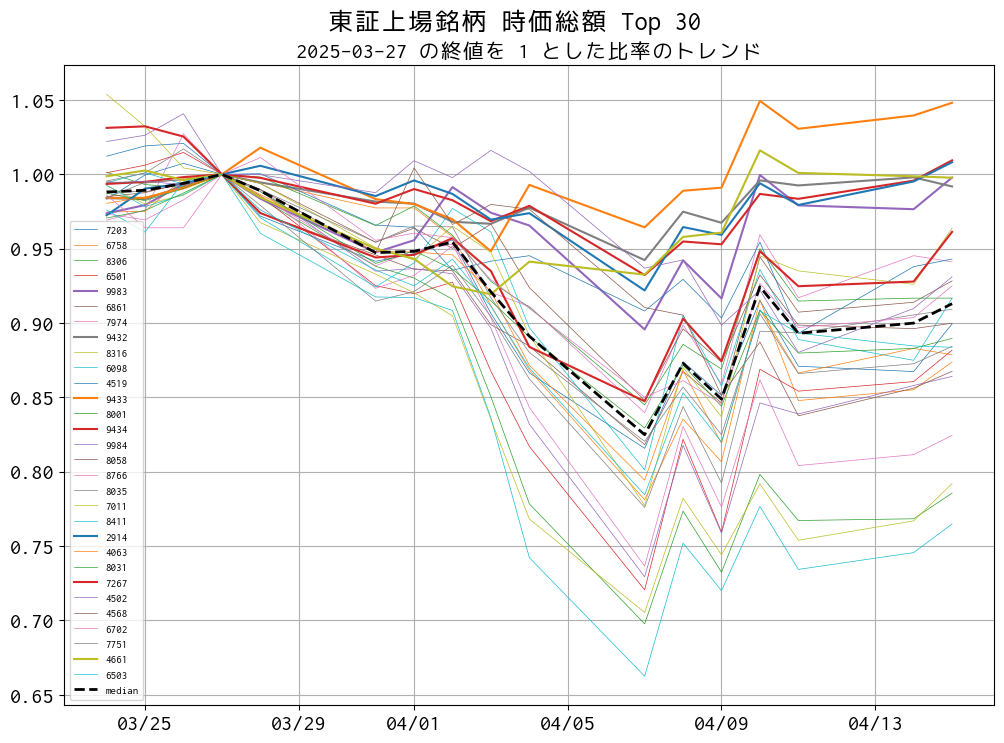

In [39]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91)

for colname in summary.columns:
    match colname:
        case '7267':
            width = 1.5
            lstyle = 'solid'
        case '9983':
            width = 1.5
            lstyle = 'solid'
        case '4661':
            width = 1.5
            lstyle = 'solid'
        case '2914':
            width = 1.5
            lstyle = 'solid'
        case '9432':
            width = 1.5
            lstyle = 'solid'
        case '9433':
            width = 1.5
            lstyle = 'solid'
        case '9434':
            width = 1.5
            lstyle = 'solid'
        case _:
            width = 0.5
            lstyle = 'solid'

    ax.plot(summary[colname], lw=width, ls=lstyle, label=colname)

ax.plot(summary.median(axis=1), lw=2, color='black', ls='dashed', label='median')

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
#ax.xaxis.set_ticks(df.index)

m = pattern.match(str(dt))
date_str = m.group(1)
fig.suptitle('東証上場銘柄 時価総額 Top 30')
ax.set_title('%s の終値を 1 とした比率のトレンド' % date_str, fontsize=16)
ax.grid()
ax.legend(loc='lower left', fontsize=8)

plt.savefig('report_bottom_out.png' )
plt.show()

In [45]:
for code in ['9433', '9434', '2914', '9983', '4661', '9432', '7267']:
    get_code_into(code)
    print()

9433 KDDI Corporation
2025-04-11    1.030631
2025-04-14    1.039592
2025-04-15    1.048135
Name: Close, dtype: float64

9434 SoftBank Corp.
2025-04-11    0.983537
2025-04-14    0.995767
2025-04-15    1.009407
Name: Close, dtype: float64

2914 Japan Tobacco Inc.
2025-04-11    0.979401
2025-04-14    0.995210
2025-04-15    1.008144
Name: Close, dtype: float64

9983 Fast Retailing Co., Ltd.
2025-04-11    0.979140
2025-04-14    0.976559
2025-04-15    0.997849
Name: Close, dtype: float64

4661 Oriental Land Co., Ltd.
2025-04-11    1.000968
2025-04-14    0.998710
2025-04-15    0.997742
Name: Close, dtype: float64

9432 Nippon Telegraph and Telephone Corporation
2025-04-11    0.992537
2025-04-14    0.997965
2025-04-15    0.991859
Name: Close, dtype: float64

7267 Honda Motor Co., Ltd.
2025-04-11    0.924754
2025-04-14    0.927918
2025-04-15    0.961322
Name: Close, dtype: float64



In [20]:
summary

,7203,6758,8306,6501,9983,6861,7974,9432,8316,6098,...,2914,4063,8031,7267,4502,4568,6702,7751,4661,6503
2025-03-24,1.012197,0.974625,1.001377,1.001070,0.973763,0.988840,0.969175,0.984000,0.992380,0.994455,...,0.972455,0.980535,0.970608,1.031250,0.994306,0.994916,0.986138,0.984179,0.998713,0.975996
2025-03-25,1.019091,0.975142,0.993115,1.006153,0.979355,0.988193,0.975975,0.983333,0.980088,1.001085,...,0.990419,0.984738,0.975727,1.032280,0.995401,0.994113,0.964055,0.994658,1.002575,0.961185
2025-03-26,1.020859,0.997411,0.991049,1.014714,0.993548,0.993692,1.027199,0.992000,0.985988,0.993370,...,0.993772,0.990047,0.987450,1.025412,0.992992,0.996521,0.964055,0.996507,0.996138,0.995063
2025-03-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-03-28,0.971927,0.994548,0.983672,0.985554,0.983656,0.973799,0.989588,0.994573,0.967552,0.970787,...,1.005749,0.986347,0.988415,0.973980,0.999776,0.989749,1.011334,0.989727,0.984516,0.976092
2025-03-31,0.941515,0.977414,0.938185,0.925094,0.947527,0.945819,0.923372,0.981683,0.932891,0.924312,...,0.985389,0.948075,0.940060,0.944093,0.987690,0.947127,0.955635,0.954387,0.950000,0.935673
2025-04-01,0.946734,0.977414,0.930254,0.919743,0.955699,0.936115,0.932049,0.980326,0.920354,0.940488,...,0.995928,0.947851,0.948623,0.945851,1.009176,1.004316,0.960492,0.965276,0.943226,0.925009
2025-04-02,0.955911,0.957944,0.916025,0.927501,0.991398,0.935145,0.951685,0.968114,0.904867,0.977064,...,0.986826,0.945837,0.936199,0.957103,0.997762,0.966280,0.957416,0.964660,0.924677,0.942896
2025-04-03,0.906424,0.911734,0.850478,0.867576,0.974194,0.898916,0.920632,0.966757,0.835300,0.961251,...,0.969581,0.921218,0.914876,0.934951,1.016115,0.979768,0.929080,0.916992,0.919355,0.911249
2025-04-04,0.866475,0.868380,0.778400,0.817014,0.965591,0.884522,0.911225,0.977612,0.768191,0.896910,...,0.973892,0.871531,0.890698,0.883966,1.002014,0.976531,0.909812,0.880214,0.941290,0.869797


In [21]:
summary.tail(1).iloc[0]

7203    0.899406
6758    0.873832
8306    0.785631
6501    0.881755
9983    0.997849
6861    0.928352
7974    0.941182
9432    0.991859
8316    0.792035
6098    0.916828
4519    0.943032
9433    1.048135
8001    0.916748
9434    1.009407
9984    0.864125
8058    0.899891
8766    0.824444
8035    0.909298
7011    0.963869
8411    0.764892
2914    1.008144
4063    0.878693
8031    0.889691
7267    0.961322
4502    0.931065
4568    0.867548
6702    0.925032
7751    0.884323
4661    0.997742
6503    0.883729
Name: 2025-04-15 00:00:00, dtype: float64

In [22]:
summary.median(axis=1)

2025-03-24    0.988073
2025-03-25    0.989306
2025-03-26    0.993942
2025-03-27    1.000000
2025-03-28    0.989002
2025-03-31    0.947327
2025-04-01    0.948237
2025-04-02    0.954477
2025-04-03    0.920925
2025-04-04    0.891153
2025-04-07    0.824919
2025-04-08    0.872879
2025-04-09    0.848856
2025-04-10    0.924382
2025-04-11    0.893107
2025-04-14    0.899958
2025-04-15    0.913023
dtype: float64